<div style="text-align: justify;">
    <h1><strong>PROYECTO MACHINE LEARNING</strong></h1>
    <h2>Detección de Cáncer de Piel con Fotografía Corporal Total en 3D</h2>
    <p>
        En este proyecto se utilizarán técnicas de <strong>Machine Learning</strong> para desarrollar un modelo que permita la <strong>detección temprana del cáncer de piel</strong> a partir de <strong>Fotografía Corporal Total en 3D (3D-TBP)</strong>. Utilizando imágenes tridimensionales de la piel de los pacientes, se busca identificar lesiones malignas y benignas, mejorando la precisión del diagnóstico sin necesidad de intervención dermatológica inmediata.
    </p>
</div>

## **Análisis Exploratorio de Datos**

In [70]:
import pandas as pd
df = pd.read_csv("train-metadata.csv")
df.head()

C:\Users\Marta\AppData\Local\Temp\ipykernel_16180\2029343581.py:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train-metadata.csv")


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


## **Preprocesamiento de Datos**

En esta sección de Preprocesamiento de Datos, vamos a preparar el conjunto de datos para su uso en un modelo de machine learning. Primero, abordaremos el manejo de los valores nulos, imputando o eliminando aquellos registros y columnas que contienen datos faltantes. A continuación, realizaremos la codificación de variables categóricas para convertir columnas en un formato adecuado para los modelos. También analizaremos si es necesario eliminar algunas columnas irrelevantes, para reducir la dimensionalidad y simplificar el modelo. Este proceso garantizará que los datos estén limpios, bien estructurados y listos para ser utilizados en la construcción y entrenamiento del modelo de predicción.

In [71]:
sex_dict = {'male': 0, 'female': 1}
df['sex_num'] = df['sex'].map(sex_dict)

df['age_approx'] = df['age_approx'].fillna(df['age_approx'].median())
df['sex_num'] = df['sex_num'].fillna(df['sex_num'].mode()[0])

df['anatom_site_general'] = df['anatom_site_general'].fillna('no localizado')

df_encoded = pd.get_dummies(df['anatom_site_general'])
df_encoded = df_encoded.astype(int)
df = pd.concat([df, df_encoded], axis=1)

df['tbp_tile_type'] = df['tbp_tile_type'].map({'3D: XP': 0, '3D: white': 1})

df_encoded_1 = pd.get_dummies(df["tbp_lv_location"])
df_encoded_1 = df_encoded_1.astype(int)
df = pd.concat([df, df_encoded_1], axis=1)

df_encoded_2 = pd.get_dummies(df["tbp_lv_location_simple"])
df_encoded_2 = df_encoded_2.astype(int)
df = pd.concat([df, df_encoded_2], axis=1)

df_encoded_3 = pd.get_dummies(df["iddx_1"])
df_encoded_3 = df_encoded_3.astype(int)
df = pd.concat([df, df_encoded_3], axis=1)

df = df.drop(["patient_id", "sex", "anatom_site_general", "copyright_license", "lesion_id", "iddx_5", "mel_mitotic_index", "image_type","tbp_lv_location","tbp_lv_location_simple","attribution", "iddx_2", "iddx_3", "iddx_4", "mel_thick_mm", "iddx_full", "iddx_1"], axis=1)


In [72]:
df = df.loc[:, ~df.columns.duplicated()]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 69 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   age_approx                    401059 non-null  float64
 3   clin_size_long_diam_mm        401059 non-null  float64
 4   tbp_tile_type                 401059 non-null  int64  
 5   tbp_lv_A                      401059 non-null  float64
 6   tbp_lv_Aext                   401059 non-null  float64
 7   tbp_lv_B                      401059 non-null  float64
 8   tbp_lv_Bext                   401059 non-null  float64
 9   tbp_lv_C                      401059 non-null  float64
 10  tbp_lv_Cext                   401059 non-null  float64
 11  tbp_lv_H                      401059 non-null  float64
 12  tbp_lv_Hext                   401059 non-nul

## **Preprocesamiento de imágenes**

In [4]:
# import zipfile

# with zipfile.ZipFile('train-image.zip', 'r') as zip_ref:
    # zip_ref.extractall(r'C:\Users\Marta\Desktop\proyecto_ML')

In [260]:
import cv2
import os

def redimensionar_imagenes(carpeta_origen, carpeta_destino, nuevo_tamano=(64, 64)):
    """Redimensiona todas las imágenes en una carpeta.

    Args:
        carpeta_origen: Ruta a la carpeta con las imágenes originales.
        carpeta_destino: Ruta a la carpeta donde se guardarán las imágenes redimensionadas.
        nuevo_tamano: Tupla con el nuevo ancho y alto de las imágenes.
    """

    for archivo in os.listdir(carpeta_origen):
        ruta_imagen = os.path.join(carpeta_origen, archivo)
        img = cv2.imread(ruta_imagen)
        img_redimensionada = cv2.resize(img, nuevo_tamano)
        cv2.imwrite(os.path.join(carpeta_destino, archivo), img_redimensionada)

# carpeta_origen = "image"
# carpeta_destino = "image_red"
# redimensionar_imagenes(carpeta_origen, carpeta_destino)

<Axes: xlabel='target'>

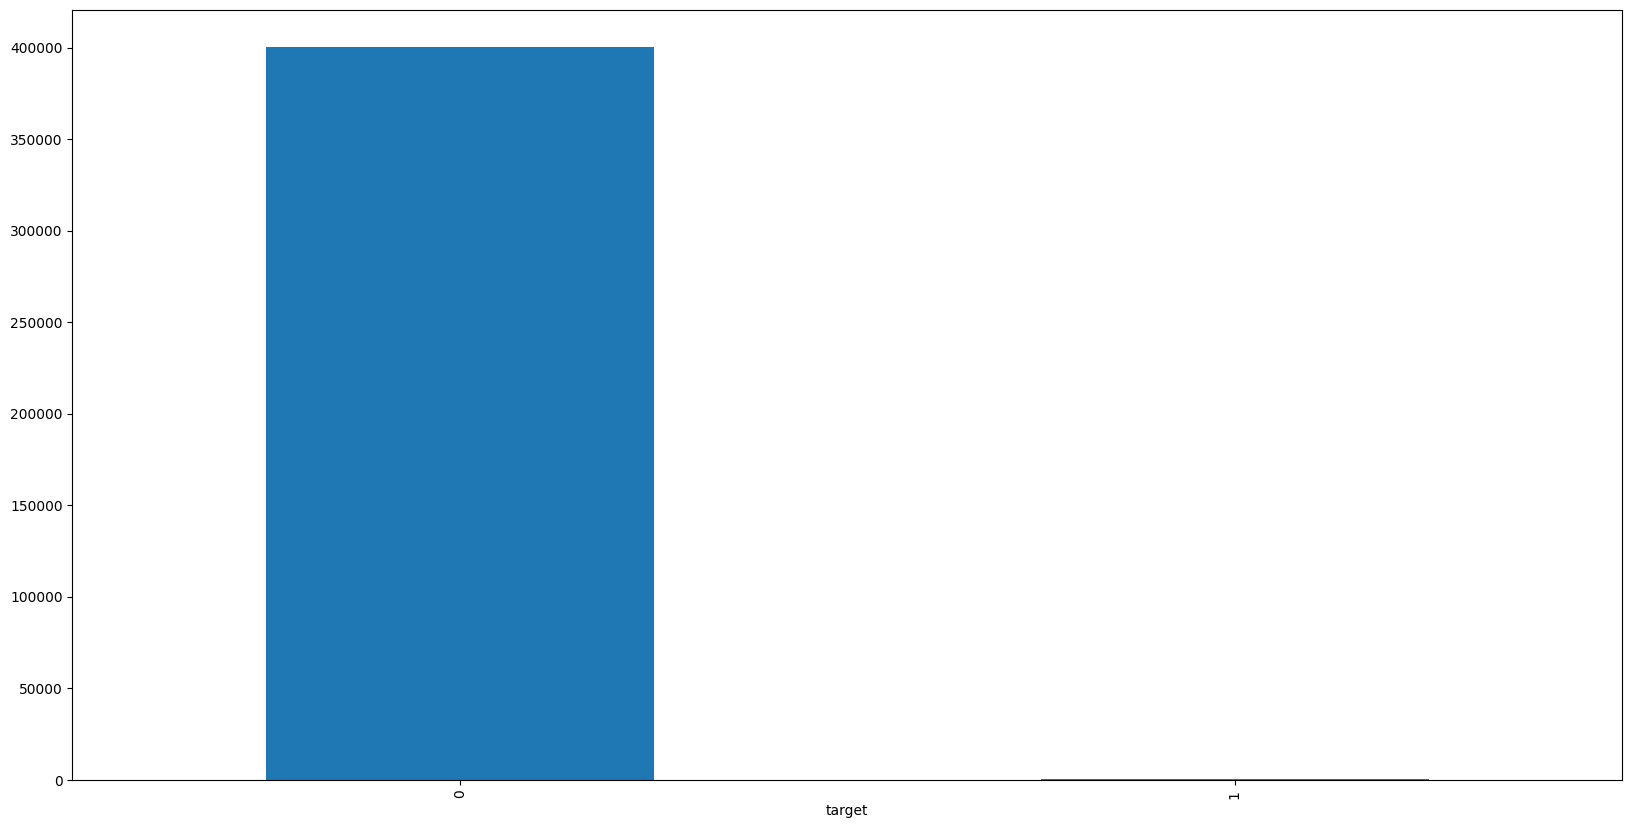

In [261]:
df['target'].value_counts().plot(kind='bar', figsize=(20,10))

In [262]:
df['target'].value_counts()

target
0    400666
1       393
Name: count, dtype: int64

Los datos que tenemos presentan un desbalance entre las clases, ya que hay una gran cantidad de muestras de la clase "benigno" (0), con 400,666 casos, mientras que la clase "maligno" (1), que corresponde a los casos de melanoma, tiene solo 393 muestras. Este desbalance puede ser un desafío para nuestro modelo, ya que los algoritmos suelen favorecer la clase más grande, lo que podría hacer que el modelo no sea tan preciso al identificar los casos de melanoma. Por eso, será importante tener en cuenta este desajuste y aplicar estrategias como equilibrar las clases. Así, podremos asegurarnos de que el modelo sea capaz de detectar con precisión tanto las lesiones benignas como las malignas, lo cual es crucial en la detección temprana del melanoma.

## **Entrenamiento con 30.393 imágenes**
Vamos a entrenar el modelo con un total de 30,393 imágenes, ya que utilizar las 401,059 imágenes sería excesivo para entrenarlo en un entorno local. Reducir la cantidad de datos permitirá optimizar el tiempo de procesamiento y asegurará que el modelo se entrene de manera más eficiente sin sobrecargar los recursos disponibles.

In [74]:
import pandas as pd
import numpy as np

def seleccionar_imagenes(df, num_malignas=393, num_benignas=30000):
    # Filtramos las imágenes malignas (1)
    malignas = df[df['target'] == 1]
    # Filtramos las imágenes benignas (0)
    benignas = df[df['target'] == 0]
    
    # Seleccionamos las 363 malignas
    malignas_seleccionadas = malignas.sample(n=num_malignas, random_state=42)
    
    # Seleccionamos 10000 benignas aleatorias
    benignas_seleccionadas = benignas.sample(n=num_benignas, random_state=42)
    
    # Concatenamos ambas selecciones
    imagenes_seleccionadas = pd.concat([malignas_seleccionadas, benignas_seleccionadas])
    
    return imagenes_seleccionadas

In [264]:
import os
import shutil

def copiar_imagenes(imagenes_df, carpeta_origen, carpeta_destino):

    if not os.path.exists(carpeta_destino):
        os.makedirs(carpeta_destino)
    
    for _, row in imagenes_df.iterrows():
        ruta_imagen = row['isic_id']  
        nombre_imagen = os.path.basename(ruta_imagen + ".jpg")  
        
        ruta_origen = os.path.join(carpeta_origen, nombre_imagen)
        ruta_destino = os.path.join(carpeta_destino, nombre_imagen)
        
        if os.path.exists(ruta_origen):
            shutil.copy(ruta_origen, ruta_destino)
        else:
            print(f"Advertencia: La imagen {nombre_imagen} no se encontró en la carpeta de origen.")

In [75]:
imagenes_seleccionadas = seleccionar_imagenes(df, num_malignas=393, num_benignas=30000)

# carpeta_origen = "image_b"
# carpeta_destino = "image_prueba_red"
# copiar_imagenes(imagenes_seleccionadas, carpeta_origen, carpeta_destino)

In [353]:
imagenes_seleccionadas.head()

,isic_id,target,age_approx,clin_size_long_diam_mm,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,...,Torso Back Bottom Third,Torso Back Middle Third,Torso Back Top Third,Torso Front,Torso Front Bottom Half,Torso Front Top Half,Unknown,Benign,Indeterminate,Malignant
73241,ISIC_1885694,1,60.0,2.70,1,26.867286,20.574389,29.461461,26.856155,39.872657,...,0,0,0,0,0,0,0,0,0,1
270490,ISIC_6776067,1,55.0,5.15,0,22.845289,22.149905,23.111735,26.409293,32.497069,...,0,0,0,0,0,0,0,0,0,1
248412,ISIC_6242031,1,80.0,16.07,1,26.971403,27.187709,23.842357,26.412866,35.998814,...,0,0,0,0,0,0,0,0,0,1
44234,ISIC_1164461,1,60.0,1.13,0,23.238357,21.063823,22.505005,24.863248,32.349597,...,0,0,0,0,0,0,0,0,0,1
396165,ISIC_9877311,1,50.0,8.16,0,17.351658,11.348823,23.910937,24.652597,29.543408,...,0,1,0,0,0,0,0,0,0,1


In [354]:
imagenes_seleccionadas.shape

(30393, 69)

De las 30,393 imágenes que vamos a utilizar para el entrenamiento, 30,000 son benignas y 393 son malignas, lo que genera un desbalance de clases en el conjunto de datos. Este desequilibrio va a requerir el uso de técnicas específicas para manejar el desbalance y mejorar el rendimiento del modelo en la clasificación de ambas clases.

<Axes: xlabel='target'>

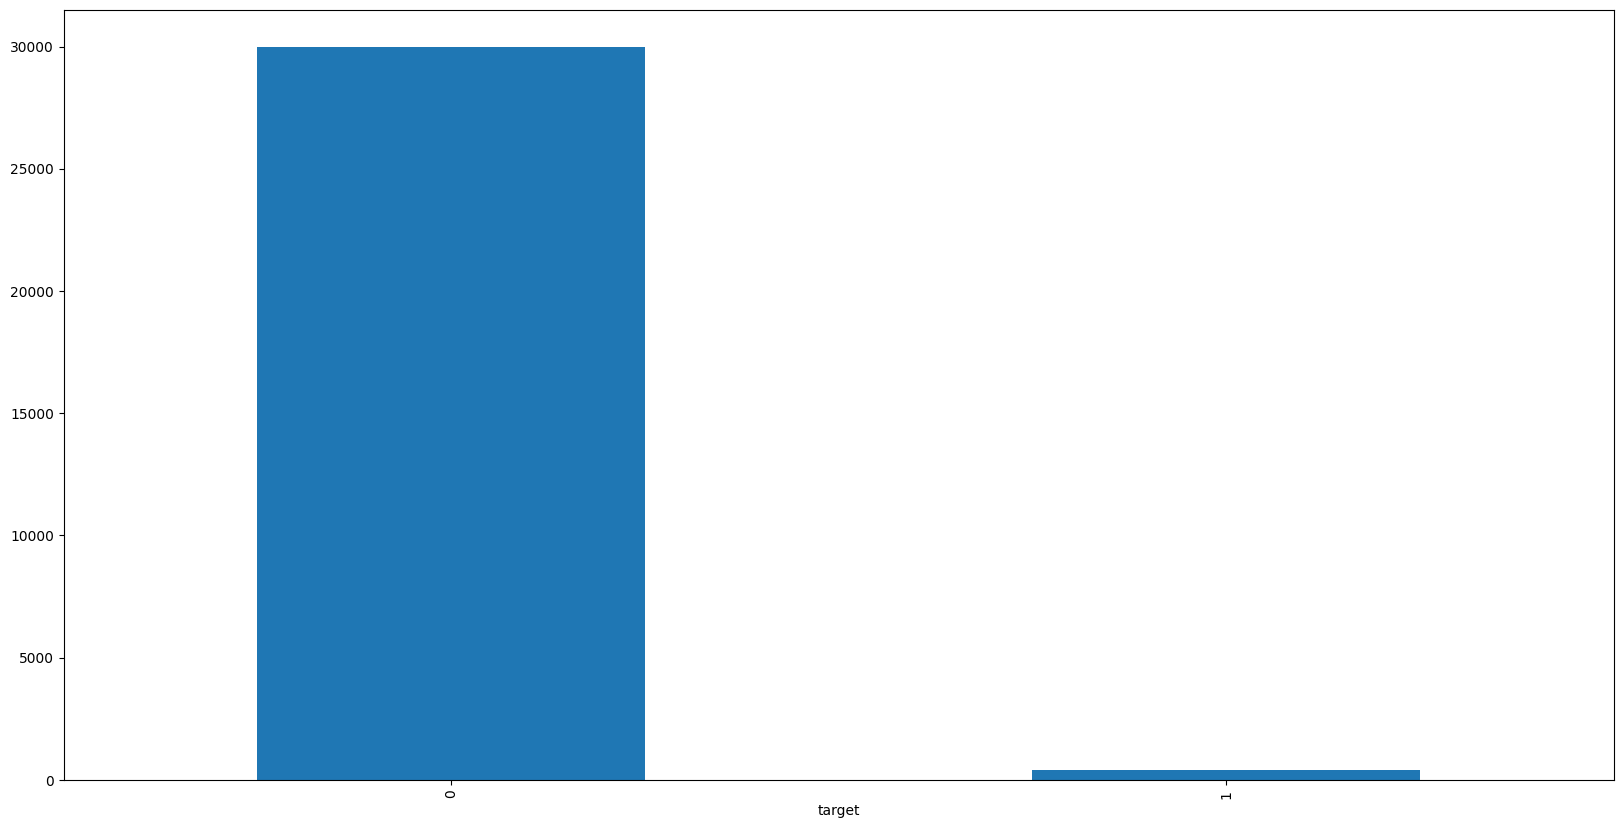

In [268]:
imagenes_seleccionadas['target'].value_counts().plot(kind='bar', figsize=(20,10))

In [ ]:
import pandas as pd
import shutil
import os

os.makedirs('imagenes_benignas', exist_ok=True)
os.makedirs('imagenes_malignas', exist_ok=True)

for index, row in imagenes_seleccionadas.iterrows():
    filename = row['isic_id']
    target = row['target']
    
    if target == 0:
        shutil.copy('image_prueba_red/' + filename + '.jpg', 'imagenes_benignas')
    else:
        shutil.copy('image_prueba_red/' + filename + '.jpg', 'imagenes_malignas')

In [14]:
# carpeta_origen = 'image'
# carpeta_destino = 'image_b'
# redimensionar_imagenes(carpeta_origen, carpeta_destino)

In [43]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
import random

dir_path = 'dir'
malignant_folder = os.path.join(dir_path, 'imagenes_malignas')  
benign_folder = os.path.join(dir_path, 'imagenes_benignas')  

# Crear un generador de augmentación de imágenes
datagen = ImageDataGenerator(
    rotation_range=40,     # Rotación aleatoria entre -40 y 40 grados
    width_shift_range=0.2,  # Desplazamiento horizontal aleatorio
    height_shift_range=0.2, # Desplazamiento vertical aleatorio
    shear_range=0.2,       # Transformación por corte aleatorio
    zoom_range=0.2,        # Zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal aleatorio
    fill_mode='nearest'    # Relleno para los pixeles vacíos
)

malignant_images = [os.path.join(malignant_folder, f) for f in os.listdir(malignant_folder) if f.endswith(('jpg'))]

num_augmented_images = 100

for img_path in malignant_images:
    img = load_img(img_path)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    i = 0
    for batch in datagen.flow(img_array, batch_size=1, save_to_dir=malignant_folder, save_prefix='aug', save_format='jpeg'):
        i += 1
        if i >= num_augmented_images:
            break

print("Data augmentation completado para las imágenes malignas.")


Data augmentation completado para las imágenes malignas.


In [38]:
# import tensorflow as tf
# import pandas as pd
# import numpy as np
# from tensorflow.keras.preprocessing import image
# import matplotlib.pyplot as plt

# rutas_imagenes = imagenes_seleccionadas['isic_id'].values

# images = []
# train_path = "image_prueba_red/"
# for img_path in rutas_imagenes:
#     
#     img = image.load_img(train_path + img_path + ".jpg", target_size=(64, 64))  # Redimensiona a 64x64 (tamaño estándar)
#   
#     img_array = image.img_to_array(img) / 255.0  
    
#     # Agregar la imagen a la lista
#     images.append(img_array)

# # Convertir la lista de imágenes en un array de numpy
# images = np.array(images)

# print(images.shape)

# for i in range(1): 
#     plt.imshow(images[i])
#     plt.show()

# labels = imagenes_seleccionadas['target'].values
# labels


In [11]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# dir_path = 'dir'

# train_datagen = ImageDataGenerator(
#     rescale=1./255,          
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True    
# )

# train_generator = train_datagen.flow_from_directory(
#     dir_path,               
#     target_size=(150, 150), 
#     batch_size=32,
#     class_mode='binary',    
#     shuffle=True            


Found 33626 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorio principal
dir_path = 'dir'

# Crear un generador de datos con una división para validación (validation_split)
datagen = ImageDataGenerator(
    rescale=1./255,          
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2    
)

# Generador de entrenamiento 
train_generator = datagen.flow_from_directory(
    dir_path,              
    target_size=(150, 150), 
    batch_size=32,
    class_mode='binary',    
    subset='training',      
    shuffle=True          
)


validation_generator = datagen.flow_from_directory(
    dir_path,              
    target_size=(150, 150), 
    batch_size=32,
    class_mode='binary',    
    subset='validation',    
    shuffle=False           
)


Found 32311 images belonging to 2 classes.
Found 8077 images belonging to 2 classes.


## **Red Neuronal Convolucional (CNN)**

In [8]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model

def create_cnn(width, height, depth):

    inputShape = (height, width, depth)
    # Definimos la capa de entrada
    input_layer = Input(shape=inputShape)

    # Primer bloque convolucional
    x = Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.4)(x)

    # Segundo bloque concolucional 
    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.4)(x)

    # Tercer bloque convolucional
    x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.4)(x)

    # Aplanar la salida para conectarla a una capa densa
    x = Flatten()(x)

    # Añadimos capas densas
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.4)(x)

    # Capa de salida (usando 1 neurona para clasificación binaria)
    output_layer = Dense(1, activation='sigmoid')(x)

    # Creamos el modelo
    model = Model(inputs=input_layer, outputs=output_layer, name="Modelo")
    return model

In [9]:
model = create_cnn(150, 150, 3) 

In [48]:
model.summary()

Model: "Modelo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,205,765 (61.82 MB)

 Trainable params: 5,401,921 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,803,844 (41.21 MB)

In [17]:
# dir_path = 'dir'
# malignant_folder = os.path.join(dir_path, 'imagenes_malignas')  
# benign_folder = os.path.join(dir_path, 'imagenes_benignas')  

# num_benignas = len(os.listdir(benign_folder))   # Número de imágenes benignas
# num_malignas = len(os.listdir(malignant_folder)) # Número de imágenes malignas

# total_images = num_benignas + num_malignas
# weight_maligna = total_images / (2 * num_malignas)
# weight_benigna = total_images / (2 * num_benignas)

# class_weights = {
#     0: np.float32(weight_benigna),
#     1: np.float32(weight_maligna)
# }
# print(f'Pesos de las clases: {class_weights}')

Pesos de las clases: {0: 0.5604333, 1: 4.63679}


In [40]:
# Entrenamiento del modelo
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,         
    steps_per_epoch=32,      
    epochs=4,               
    validation_data=validation_generator,  
    validation_steps=len(validation_generator)
)

Epoch 1/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9527 - loss: 0.1134 - val_accuracy: 0.9322 - val_loss: 0.2986
Epoch 2/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - accuracy: 0.9710 - loss: 0.0850

KeyboardInterrupt: 

In [41]:
from sklearn.metrics import f1_score
import numpy as np

# Obtener las predicciones
predictions = model.predict(validation_generator, steps=len(validation_generator), verbose=1)
predicted_classes = (predictions > 0.5).astype("int32")
true_classes = validation_generator.classes
print(f"predicciones: {predictions}")

253/253 ━━━━━━━━━━━━━━━━━━━━ 63s 248ms/step
predicciones: [[0.01641596]
 [0.00624369]
 [0.27921623]
 ...
 [0.9999427 ]
 [0.9970017 ]
 [1.        ]]


In [42]:
from sklearn.metrics import classification_report

print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6000
           1       0.89      0.83      0.86      2077

    accuracy                           0.93      8077
   macro avg       0.92      0.90      0.91      8077
weighted avg       0.93      0.93      0.93      8077



In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_classes, predicted_classes)

print(cm)

[[5789  211]
 [ 359 1718]]


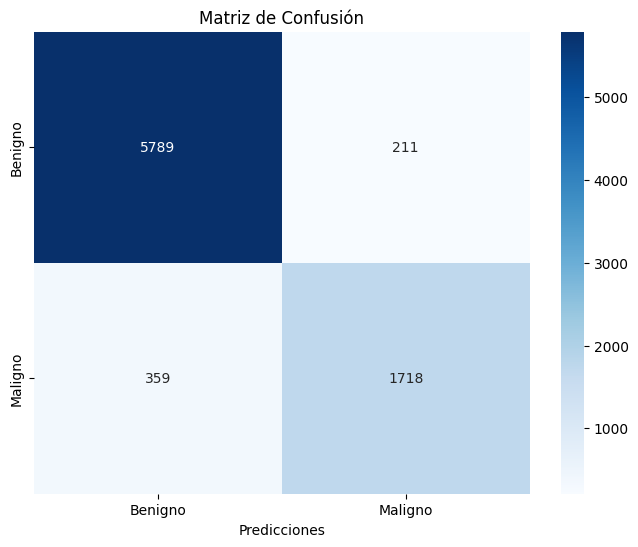

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])

# Añadir título y etiquetas a los ejes
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')

# Mostrar el gráfico
plt.show()

In [17]:
# Seleccionamos solo un subconjunto de imágenes para entrenar
# subset_images = images[:1000]  # Por ejemplo, seleccionamos las primeras 1000 imágenes
# subset_labels = labels[:1000]

# history = model.fit(subset_images, subset_labels,  # Usa las imágenes y etiquetas
#                     epochs=5,  # Número de épocas (ajústalo según tu caso)
#                     batch_size=32,  # Tamaño del lote
#                     validation_split=0.2,  # Utiliza el 20% de los datos para validación
#                     shuffle=True)

In [550]:
# Guardar el modelo entrenado
import tensorflow as tf
from tensorflow import keras

model.save('modelo_entrenado.h5')

## **Perceptrón Multicapa (MLP)**

In [76]:
imagenes_seleccionadas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30393 entries, 73241 to 368549
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   isic_id                       30393 non-null  object 
 1   target                        30393 non-null  int64  
 2   age_approx                    30393 non-null  float64
 3   clin_size_long_diam_mm        30393 non-null  float64
 4   tbp_tile_type                 30393 non-null  int64  
 5   tbp_lv_A                      30393 non-null  float64
 6   tbp_lv_Aext                   30393 non-null  float64
 7   tbp_lv_B                      30393 non-null  float64
 8   tbp_lv_Bext                   30393 non-null  float64
 9   tbp_lv_C                      30393 non-null  float64
 10  tbp_lv_Cext                   30393 non-null  float64
 11  tbp_lv_H                      30393 non-null  float64
 12  tbp_lv_Hext                   30393 non-null  float64
 13  t

In [77]:
X_df = imagenes_seleccionadas.drop(['target', 'isic_id'], axis=1).values  
y_df = imagenes_seleccionadas['target'].values

In [78]:
from sklearn.model_selection import train_test_split
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [79]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)

In [80]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

def create_mlp_model(input_dim):
    """
    Crea un modelo MLP para trabajar con las 77 características del DataFrame.
    """
    inputs = Input(shape=(input_dim,))
    x = Dense(128, activation="relu")(inputs)
    x = Dropout(0.3)(x)  
    x = BatchNormalization()(x)  
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.3)(x)
    x = BatchNormalization()(x)
    x = Dense(32, activation="relu")(x)
    x = Dropout(0.3)(x)
    x = BatchNormalization()(x)
    x = Dense(1, activation="sigmoid")(x) 
    mlp_model = Model(inputs, x)
    return mlp_model

In [83]:
mlp_model = create_mlp_model(input_dim=X_train_scaled.shape[1])

mlp_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 67)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,969 (78.00 KB)

 Trainable params: 19,521 (76.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
mlp_model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

mlp_model.fit(X_train_scaled, y_train_df, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test_df), class_weight = {0: 0.5004904334283418, 1: 510.25318066157763})

Epoch 1/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5056 - loss: 1.6910 - val_accuracy: 0.8391 - val_loss: 0.4935
Epoch 2/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7119 - loss: 0.3630 - val_accuracy: 0.9964 - val_loss: 0.1647
Epoch 3/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8693 - loss: 0.2060 - val_accuracy: 0.9987 - val_loss: 0.0614
Epoch 4/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9363 - loss: 0.1220 - val_accuracy: 1.0000 - val_loss: 0.0242
Epoch 5/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9731 - loss: 0.0747 - val_accuracy: 0.9995 - val_loss: 0.0169
Epoch 6/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9680 - loss: 0.0694 - val_accuracy: 1.0000 - val_loss: 0.0112
Epoch 7/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9781 - loss: 0.0576 - val_accuracy: 1.0000 - val_loss: 0.0077
Epoch 8/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9803 - loss: 0.0463 - val_accuracy: 1.

In [86]:
mlp_y_pred = (mlp_model.predict(X_test_scaled) > 0.5).astype("int32")
print("Evaluación del MLP:")
print(classification_report(y_test_df, mlp_y_pred))

190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Evaluación del MLP:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6005
           1       1.00      1.00      1.00        74

    accuracy                           1.00      6079
   macro avg       1.00      1.00      1.00      6079
weighted avg       1.00      1.00      1.00      6079



In [87]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test_df, mlp_y_pred)
confusion_m

array([[6005,    0],
       [   0,   74]], dtype=int64)

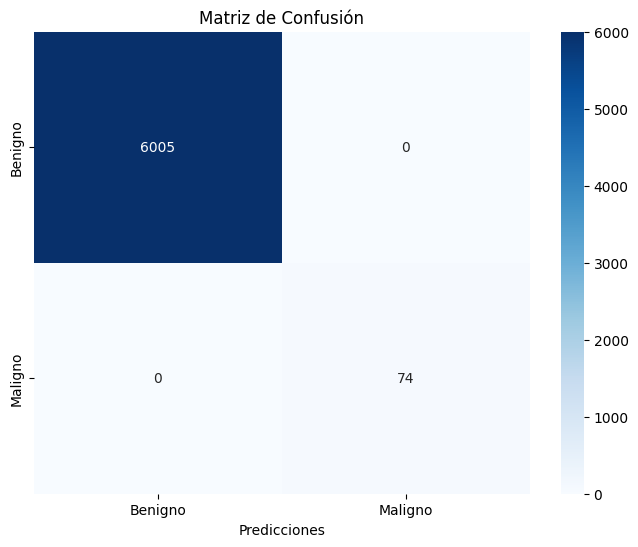

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt="d", cmap="Blues", xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])


plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])


plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.show()

In [373]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


class_weights = compute_class_weight('balanced', classes=np.unique(df['target']), y=df['target'])
class_weights_dict = dict(zip(np.unique(df['target']), class_weights))
print("Pesos de las clases:", class_weights_dict)


Pesos de las clases: {0: 0.5004904334283418, 1: 510.25318066157763}


In [376]:
mlp_model.save('modelo_entrenado_mlp.h5')

## **Predicciones combinadas**

In [328]:
import h5py
from PIL import Image
import numpy as np
from io import BytesIO

# Abrir el archivo HDF5
testing_hdf5 = h5py.File('test/test_image.hdf5', 'r')

dataset_keys = list(testing_hdf5.keys())

images = []

for key in dataset_keys:
    grupo = testing_hdf5[key]
    image_data = grupo[()] 
    
    image = Image.open(BytesIO(image_data))
    
    image = image.resize((150, 150))  
    
    image_array = np.array(image) / 255.0  
    images.append(image_array)
    

images = np.array(images)

print("Imágenes:", images.shape)



Imágenes: (3, 150, 150, 3)
Etiquetas: (3,)


In [485]:
predictions = model.predict(images) 
predicted_classes = np.argmax(predictions, axis=1)
print("Clases predichas:", predicted_classes)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Clases predichas: [0 0 0]


array([[0.23846333],
       [0.03627592],
       [0.17682631]], dtype=float32)

In [331]:
df_X_test = pd.read_csv(r'test\test-metadata.csv')
df_X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   isic_id                      3 non-null      object 
 1   patient_id                   3 non-null      object 
 2   age_approx                   3 non-null      float64
 3   sex                          3 non-null      object 
 4   anatom_site_general          3 non-null      object 
 5   clin_size_long_diam_mm       3 non-null      float64
 6   image_type                   3 non-null      object 
 7   tbp_tile_type                3 non-null      object 
 8   tbp_lv_A                     3 non-null      float64
 9   tbp_lv_Aext                  3 non-null      float64
 10  tbp_lv_B                     3 non-null      float64
 11  tbp_lv_Bext                  3 non-null      float64
 12  tbp_lv_C                     3 non-null      float64
 13  tbp_lv_Cext             

In [332]:
# Diccionario que mapea los valores de 'male' a 0 y 'female' a 1
sex_dict = {'male': 0, 'female': 1}

# Se crea una nueva columna 'sex_num' que convierte los valores de la columna 'sex' en números usando el diccionario
df_X_test['sex_num'] = df_X_test['sex'].map(sex_dict)

# Se crean variables dummy (columnas binarias) a partir de la columna 'anatom_site_general' y se convierten en tipo entero
df_encoded = pd.get_dummies(df_X_test['anatom_site_general'])
df_encoded = df_encoded.astype(int)

# Se concatena el DataFrame original con las nuevas columnas dummy generadas
df_X_test = pd.concat([df_X_test, df_encoded], axis=1)

# Se mapean los valores de 'tbp_tile_type' de un formato categórico a valores numéricos
df_X_test['tbp_tile_type'] = df_X_test['tbp_tile_type'].map({'3D: XP': 0, '3D: white': 1})

# Se crean variables dummy (columnas binarias) para la columna 'tbp_lv_location' y se convierten en tipo entero
df_encoded_1 = pd.get_dummies(df_X_test["tbp_lv_location"])
df_encoded_1 = df_encoded_1.astype(int)

# Se concatena el DataFrame original con las nuevas columnas dummy generadas para 'tbp_lv_location'
df_X_test = pd.concat([df_X_test, df_encoded_1], axis=1)

# Se crean variables dummy para la columna 'tbp_lv_location_simple' y se convierten en tipo entero
df_encoded_2 = pd.get_dummies(df_X_test["tbp_lv_location_simple"])
df_encoded_2 = df_encoded_2.astype(int)

# Se concatena el DataFrame original con las nuevas columnas dummy generadas para 'tbp_lv_location_simple'
df_X_test = pd.concat([df_X_test, df_encoded_2], axis=1)



In [334]:
# Se eliminan las columnas que no son necesarias para el análisis final
df_X_test = df_X_test.drop(["patient_id", "sex", "anatom_site_general", "copyright_license",
               "image_type","tbp_lv_location", "tbp_lv_location_simple", "attribution"], axis=1)

In [349]:
imagenes_seleccionadas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30393 entries, 73241 to 368549
Data columns (total 77 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   isic_id                       30393 non-null  object 
 1   target                        30393 non-null  int64  
 2   age_approx                    30393 non-null  float64
 3   clin_size_long_diam_mm        30393 non-null  float64
 4   tbp_tile_type                 30393 non-null  int64  
 5   tbp_lv_A                      30393 non-null  float64
 6   tbp_lv_Aext                   30393 non-null  float64
 7   tbp_lv_B                      30393 non-null  float64
 8   tbp_lv_Bext                   30393 non-null  float64
 9   tbp_lv_C                      30393 non-null  float64
 10  tbp_lv_Cext                   30393 non-null  float64
 11  tbp_lv_H                      30393 non-null  float64
 12  tbp_lv_Hext                   30393 non-null  float64
 13  t

In [378]:
df_X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   isic_id                       3 non-null      object 
 1   age_approx                    3 non-null      float64
 2   clin_size_long_diam_mm        3 non-null      float64
 3   tbp_tile_type                 3 non-null      int64  
 4   tbp_lv_A                      3 non-null      float64
 5   tbp_lv_Aext                   3 non-null      float64
 6   tbp_lv_B                      3 non-null      float64
 7   tbp_lv_Bext                   3 non-null      float64
 8   tbp_lv_C                      3 non-null      float64
 9   tbp_lv_Cext                   3 non-null      float64
 10  tbp_lv_H                      3 non-null      float64
 11  tbp_lv_Hext                   3 non-null      float64
 12  tbp_lv_L                      3 non-null      float64
 13  tbp_lv_Le

In [337]:
df_X_test.head()

,isic_id,age_approx,clin_size_long_diam_mm,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,...,tbp_lv_x,tbp_lv_y,tbp_lv_z,sex_num,lower extremity,posterior torso,Left Leg - Upper,Torso Back Top Third,Left Leg,Torso Back
0,ISIC_0015657,45.0,2.70,0,22.80433,20.007270,28.38412,27.043640,36.410100,33.640000,...,-155.06510,1511.222000,113.980100,0,0,1,0,1,0,1
1,ISIC_0015729,35.0,2.52,0,16.64867,9.657964,31.31752,27.524318,35.467806,29.169579,...,-112.36924,629.535889,-15.019287,1,1,0,1,0,1,0
2,ISIC_0015740,65.0,3.16,0,24.25384,19.937380,30.46368,28.384240,38.939500,34.686660,...,-84.29282,1303.978000,-28.576050,0,0,1,0,1,0,1


In [342]:
print("Número de columnas en df:", len(df.columns))
print("Número de columnas en df_X_test:", len(df_X_test.columns))


# Verificar qué columnas están en df pero no en df_X_test
missing_columns = df.columns.difference(df_X_test.columns)

print("Columnas en df pero no en df_X_test:", missing_columns)
print("Número de columnas faltantes:", len(missing_columns))

Número de columnas en df: 77
Número de columnas en df_X_test: 43
Columnas en df pero no en df_X_test: Index(['Benign', 'Head & Neck', 'Indeterminate', 'Left Arm',
       'Left Arm - Lower', 'Left Arm - Upper', 'Left Leg - Lower', 'Malignant',
       'Right Arm', 'Right Arm - Lower', 'Right Arm - Upper', 'Right Leg',
       'Right Leg - Lower', 'Right Leg - Upper', 'Torso Back Bottom Third',
       'Torso Back Middle Third', 'Torso Front', 'Torso Front Bottom Half',
       'Torso Front Top Half', 'Unknown', 'anterior torso', 'head/neck',
       'no localizado', 'target', 'tbp_lv_dnn_lesion_confidence',
       'upper extremity'],
      dtype='object')
Número de columnas faltantes: 26


In [343]:
for column in missing_columns:
    df_X_test[column] = 0

In [381]:
df_X_test = df_X_test.drop(["isic_id", "target"], axis=1)

In [407]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_test_scaled = scaler.fit_transform(df_X_test)
predictions = mlp_model.predict(X_test_scaled)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[0.0036389 ],
       [0.00294371],
       [0.00091875]], dtype=float32)

In [410]:
# F1-score ponderado para el CNN y MLP
f1_cnn = 0.89 
f1_mlp = 1.00  

# Calcular la suma total de los F1-scores
total_f1 = f1_cnn + f1_mlp

# Calcular los pesos de cada modelo
peso_cnn = f1_cnn / total_f1
peso_mlp = f1_mlp / total_f1

# Mostrar los pesos
print("Peso del CNN:", peso_cnn)
print("Peso del MLP:", peso_mlp)


Peso del CNN: 0.4708994708994709
Peso del MLP: 0.5291005291005291


In [419]:
# Predicciones de los modelos
y_pred_cnn = model.predict(images)
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Calcular la media ponderada de las predicciones
pred_final = (y_pred_cnn * peso_cnn + y_pred_mlp * peso_mlp) / (peso_cnn + peso_mlp)

# Convertir la predicción ponderada en una clase (0 o 1)
final_class = (pred_final > 0.5).astype(int)

# Mostrar las predicciones finales
print("Predicciones finales (clases):", pred_final)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicciones finales (clases): [[0.23075853]
 [0.22624756]
 [0.22599158]]


## **Kaggle: predicciones**

In [ ]:
df_sub = pd.read_csv('sample_submission.csv')
df_sub["target"] = final_class
df_sub.to_csv('predicciones.csv', index=False)

In [90]:
predicciones = pd.read_csv('predicciones.csv')
predicciones

,isic_id,target
0,ISIC_0015657,0
1,ISIC_0015729,0
2,ISIC_0015740,0


## **Prueba con imágenes reales**

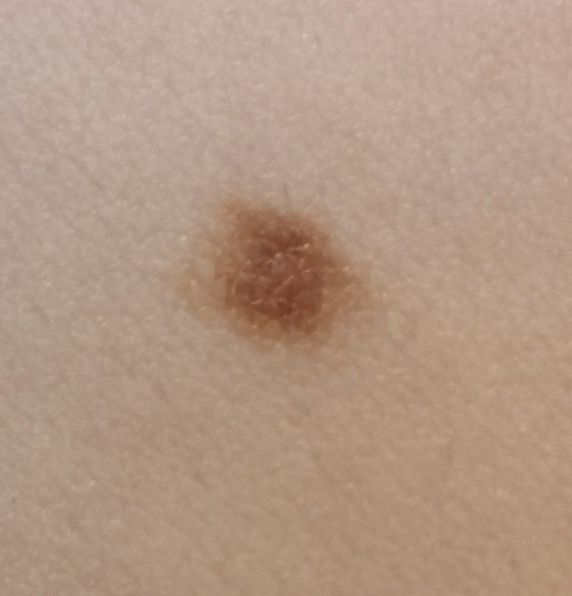

In [62]:
from PIL import Image

image_path = r"C:\Users\Marta\Desktop\proyecto_ML_Melanoma\benigno2.jpg"
img = Image.open(image_path)
img

In [63]:
img_resized = img.resize((150, 150))  

# Convertir la imagen a un array de numpy
import numpy as np
img_array = np.array(img_resized)


In [64]:
img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)  


In [65]:
prediction = model.predict(img_array)

predicted_class = np.round(prediction)

print("Probabilidad:", prediction)
print("Clase predicha:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Probabilidad: [[0.00338814]]
Clase predicha: [[0.]]
